# TME Intelligence artificielle pour la robotique
# TD3 from Stable Baseline 3 on LunarLanderContinuous-v2

* Étudiant 1: **CHAMOUN Joe 21312860**
* Étudiant 2: **GHENAIET Walid 21307720**


## Installations

In [ ]:
!pip uninstall gym box2d-py stable-baselines3 -y

In [ ]:
!pip install gymnasium

In [ ]:
!pip install stable-baselines3

In [ ]:
!pip install swig

In [ ]:
!pip install box2d-py==2.3.8

## Training the model in the environment

In [3]:
import gymnasium as gym
from stable_baselines3 import TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
import numpy as np
import cv2
from IPython import display
from IPython.display import Video
import pickle
import matplotlib.pyplot as plt

In [4]:
def create_environment(seed=None):
  env = gym.make('LunarLanderContinuous-v2')

  if seed is not None:
    env.reset(seed=seed)

  env = Monitor(env)
  env = DummyVecEnv([lambda: env])

  return env


In [5]:
def create_SB3_TD3_agent(seed=None):
  if seed is None:
    return TD3('MlpPolicy', env, verbose=0)
  else:
    return TD3('MlpPolicy', env, verbose=0, seed=seed)


In [6]:
def train_TD3(env, model, total_timesteps=1000, seed=None):
    model.learn(total_timesteps)


    # saving the model
    model_name = f"td3_lunarlander_seed_{seed}" if seed else "td3_lunarlander"
    model.save(model_name)

    # saving the rewards
    rewards_file_name = f"td3_lunarlander_seed_{seed}_rewards.pkl" if seed else "td3_lunarlander_rewards.pkl"
    rewards = env.envs[0].get_episode_rewards()

    with open(rewards_file_name, 'wb') as f:
      pickle.dump(rewards, f)

    env.close()

    print(f"Training done for seed {seed} - rewards and model saved.")

    return rewards


In [7]:
seeds = [1, 42, 123, 234, 345, 456, 567, 678, 789, 890]


In [ ]:
total_timesteps = 50000


for seed in seeds:
  env = create_environment(seed)

  model_td3 = create_SB3_TD3_agent(seed)

  train_TD3(env, model_td3, total_timesteps, seed)

## Drawing the learning curve

In [12]:
def draw_rewards_learning_curve(rewards):
  min_length = min(len(seed_rewards) for seed_rewards in rewards)

  trimmed_rewards = [seed_rewards[:min_length] for seed_rewards in rewards]

  rewards_array = np.array(trimmed_rewards)

  mean_rewards = np.mean(rewards_array, axis=0)
  std_rewards = np.std(rewards_array, axis=0)

  plt.figure(figsize=(10, 6))
  plt.plot(mean_rewards, label='Mean Episode Reward', color='b')
  plt.fill_between(range(len(mean_rewards)),
                  mean_rewards - std_rewards,
                  mean_rewards + std_rewards,
                  color='b', alpha=0.2, label='Std Dev')
  plt.xlabel('Episode')
  plt.ylabel('Reward')
  plt.title('Learning Curve: TD3 on LunarLanderContinuous-v2 (10 Seeds)')
  plt.legend()
  plt.grid(True)
  plt.show()


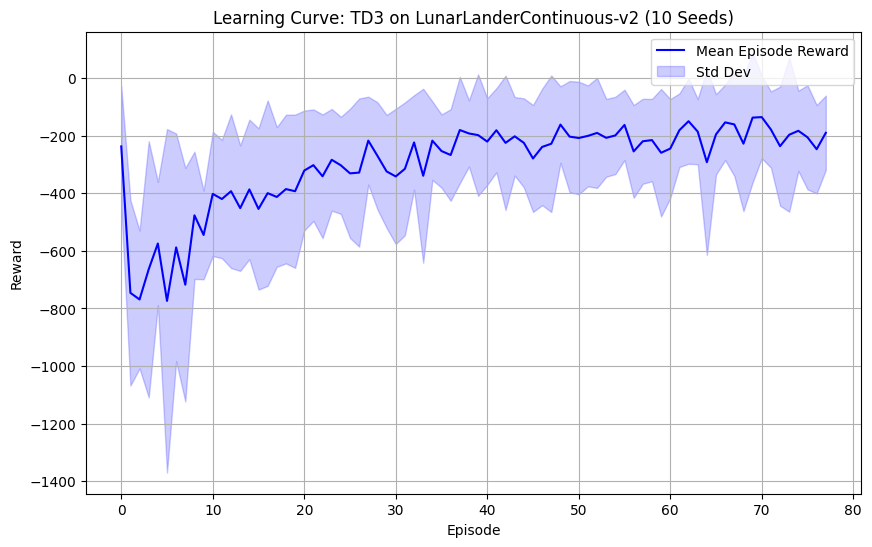

In [14]:
rewards = []
for seed in seeds:
  rewards_file = f'td3_lunarlander_seed_{seed}_rewards.pkl'

  with open(rewards_file, 'rb') as f:
    loaded_rewards = pickle.load(f)

  rewards.append(loaded_rewards)

draw_rewards_learning_curve(rewards)


## Testing the model

In [8]:
seed = 42

# Loading the trained TD3 model
model_td3 = TD3.load(f"td3_lunarlander_seed_{seed}")

# Creating the environment for testing
env = gym.make('LunarLanderContinuous-v2',render_mode="rgb_array")
env.reset(seed=seed)
env = DummyVecEnv([lambda: env])

frames = []

obs = env.reset()
for _ in range(5000):
    action, _states = model_td3.predict(obs)
    obs, rewards, dones, info = env.step(action)
    img = env.render()
    frames.append(img)

# Close the environment
env.close()

## Saving the video

In [ ]:
height, width, layers = frames[0].shape
video_name = 'td3_lunarlander_video.mp4'
fps = 30

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

for frame in frames:
    video_writer.write(frame)

# Release the video writer
video_writer.release()

<video controls src="td3_lunarlander_video.mp4" />